<span id="1_"></span> <span id="1_1_"></span>

In \[1\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

In \[3\]:

    #Read the CSV file.
    df = pd.read_csv(Basketball.csv)

In \[4\]:

    # Shape of the data
    df.shape

Out\[4\]:

    (61, 13)

In \[6\]:

    df.head(3).T

Out\[6\]:

|                     | 0      | 1      | 2      |
|---------------------|--------|--------|--------|
| Team                | Team 1 | Team 2 | Team 3 |
| Tournament          | 86     | 86     | 80     |
| Score               | 4385   | 4262   | 3442   |
| PlayedGames         | 2762   | 2762   | 2614   |
| WonGames            | 1647   | 1581   | 1241   |
| DrawnGames          | 552    | 573    | 598    |
| LostGames           | 563    | 608    | 775    |
| BasketScored        | 5947   | 5900   | 4534   |
| BasketGiven         | 3140   | 3114   | 3309   |
| TournamentChampion  | 33     | 25     | 10     |
| Runner-up           | 23     | 25     | 8      |
| TeamLaunch          | 1929   | 1929   | 1929   |
| HighestPositionHeld | 1      | 1      | 1      |

In \[7\]:

    # Visualize the datatypes
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 61 entries, 0 to 60
    Data columns (total 13 columns):
    Team                   61 non-null object
    Tournament             61 non-null int64
    Score                  61 non-null object
    PlayedGames            61 non-null object
    WonGames               61 non-null object
    DrawnGames             61 non-null object
    LostGames              61 non-null object
    BasketScored           61 non-null object
    BasketGiven            61 non-null object
    TournamentChampion     61 non-null object
    Runner-up              61 non-null object
    TeamLaunch             61 non-null object
    HighestPositionHeld    61 non-null int64
    dtypes: int64(2), object(11)
    memory usage: 6.3+ KB

In \[8\]:

    # Describe the data
    df.describe().T

Out\[8\]:

|                     | count | mean      | std       | min | 25% | 50%  | 75%  | max  |
|---------------------|-------|-----------|-----------|-----|-----|------|------|------|
| Tournament          | 61.0  | 24.000000 | 26.827225 | 1.0 | 4.0 | 12.0 | 38.0 | 86.0 |
| HighestPositionHeld | 61.0  | 7.081967  | 5.276663  | 1.0 | 3.0 | 6.0  | 10.0 | 20.0 |

In \[9\]:

    df.drop(columns=[Team], inplace=True)

In \[10\]:

    # Missing Values
    columns_with_miss = df.isna().sum()
    #filtering only the columns with at least 1 missing value
    columns_with_miss = columns_with_miss[columns_with_miss!=0]
    #The number of columns with missing values
    print(Columns with missing values:, len(columns_with_miss))
    #sorting the columns by the number of missing values descending
    columns_with_miss.sort_values(ascending=False)

    Columns with missing values: 0

Out\[10\]:

    Series([], dtype: int64)

In \[17\]:

    # get the number of missing data points per column
    missing_values_count = df.isnull().sum()

    # look at the # of missing points in the first ten columns
    missing_values_count[0:10]

Out\[17\]:

    Tournament            0
    Score                 0
    PlayedGames           0
    WonGames              0
    DrawnGames            0
    LostGames             0
    BasketScored          0
    BasketGiven           0
    TournamentChampion    0
    Runner-up             0
    dtype: int64

In \[18\]:

    # how many total missing values do we have?
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()

    # percent of data that is missing
    (total_missing/total_cells) * 100

Out\[18\]:

    0.0

In \[21\]:

    # remove all the rows that contain a missing value
    df.dropna()

Out\[21\]:

|     | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 0   | 86         | 4385  | 2762        | 1647     | 552        | 563       | 5947         | 3140        | 33                 | 23        | 1929       | 1                   |
| 1   | 86         | 4262  | 2762        | 1581     | 573        | 608       | 5900         | 3114        | 25                 | 25        | 1929       | 1                   |
| 2   | 80         | 3442  | 2614        | 1241     | 598        | 775       | 4534         | 3309        | 10                 | 8         | 1929       | 1                   |
| 3   | 82         | 3386  | 2664        | 1187     | 616        | 861       | 4398         | 3469        | 6                  | 6         | 1931to32   | 1                   |
| 4   | 86         | 3368  | 2762        | 1209     | 633        | 920       | 4631         | 3700        | 8                  | 7         | 1929       | 1                   |
| ... | ...        | ...   | ...         | ...      | ...        | ...       | ...          | ...         | ...                | ...       | ...        | ...                 |
| 56  | 1          | 34    | 38          | 8        | 10         | 20        | 38           | 66          | \-                 | \-        | 2009-10    | 20                  |
| 57  | 1          | 22    | 30          | 7        | 8          | 15        | 37           | 57          | \-                 | \-        | 1956-57    | 16                  |
| 58  | 1          | 19    | 30          | 7        | 5          | 18        | 51           | 85          | \-                 | \-        | 1951\~52   | 16                  |
| 59  | 1          | 14    | 30          | 5        | 4          | 21        | 34           | 65          | \-                 | \-        | 1955-56    | 15                  |
| 60  | 1          | \-    | \-          | \-       | \-         | \-        | \-           | \-          | \-                 | \-        | 2017\~18   | 9                   |

61 rows × 12 columns

In \[22\]:

    # remove all columns with at least one missing value
    columns_with_na_dropped = df.dropna(axis=1)
    columns_with_na_dropped.head()

Out\[22\]:

|     | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 0   | 86         | 4385  | 2762        | 1647     | 552        | 563       | 5947         | 3140        | 33                 | 23        | 1929       | 1                   |
| 1   | 86         | 4262  | 2762        | 1581     | 573        | 608       | 5900         | 3114        | 25                 | 25        | 1929       | 1                   |
| 2   | 80         | 3442  | 2614        | 1241     | 598        | 775       | 4534         | 3309        | 10                 | 8         | 1929       | 1                   |
| 3   | 82         | 3386  | 2664        | 1187     | 616        | 861       | 4398         | 3469        | 6                  | 6         | 1931to32   | 1                   |
| 4   | 86         | 3368  | 2762        | 1209     | 633        | 920       | 4631         | 3700        | 8                  | 7         | 1929       | 1                   |

In \[23\]:

    # just how much data did we lose?
    print("Columns in original dataset: %d \n" % df.shape[1])
    print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

    Columns in original dataset: 12 

    Columns with na's dropped: 12

In \[29\]:

    # get a small subset of the NFL dataset
    subset_df = df.loc[:, Tournament:].head()
    subset_df

Out\[29\]:

|     | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 0   | 86         | 4385  | 2762        | 1647     | 552        | 563       | 5947         | 3140        | 33                 | 23        | 1929       | 1                   |
| 1   | 86         | 4262  | 2762        | 1581     | 573        | 608       | 5900         | 3114        | 25                 | 25        | 1929       | 1                   |
| 2   | 80         | 3442  | 2614        | 1241     | 598        | 775       | 4534         | 3309        | 10                 | 8         | 1929       | 1                   |
| 3   | 82         | 3386  | 2664        | 1187     | 616        | 861       | 4398         | 3469        | 6                  | 6         | 1931to32   | 1                   |
| 4   | 86         | 3368  | 2762        | 1209     | 633        | 920       | 4631         | 3700        | 8                  | 7         | 1929       | 1                   |

In \[31\]:

    # replace all NA's the value that comes directly after it in the same column, 
    # then replace all the reamining na's with 0
    subset_df.fillna(method = bfill, axis=0).fillna(0)

Out\[31\]:

|     | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 0   | 86         | 4385  | 2762        | 1647     | 552        | 563       | 5947         | 3140        | 33                 | 23        | 1929       | 1                   |
| 1   | 86         | 4262  | 2762        | 1581     | 573        | 608       | 5900         | 3114        | 25                 | 25        | 1929       | 1                   |
| 2   | 80         | 3442  | 2614        | 1241     | 598        | 775       | 4534         | 3309        | 10                 | 8         | 1929       | 1                   |
| 3   | 82         | 3386  | 2664        | 1187     | 616        | 861       | 4398         | 3469        | 6                  | 6         | 1931to32   | 1                   |
| 4   | 86         | 3368  | 2762        | 1209     | 633        | 920       | 4631         | 3700        | 8                  | 7         | 1929       | 1                   |

In \[ \]:

     

------------------------------------------------------------------------

<span id="1_2_"></span>

In \[29\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline

In \[30\]:

    #Read the CSV file.
    df = pd.read_csv(Basketball.csv)

In \[32\]:

    # Print out the first five rows of the player_df DataFrame.
    df.head()

Out\[32\]:

|     | Team   | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|--------|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 0   | Team 1 | 86         | 4385  | 2762        | 1647     | 552        | 563       | 5947         | 3140        | 33                 | 23        | 1929       | 1                   |
| 1   | Team 2 | 86         | 4262  | 2762        | 1581     | 573        | 608       | 5900         | 3114        | 25                 | 25        | 1929       | 1                   |
| 2   | Team 3 | 80         | 3442  | 2614        | 1241     | 598        | 775       | 4534         | 3309        | 10                 | 8         | 1929       | 1                   |
| 3   | Team 4 | 82         | 3386  | 2664        | 1187     | 616        | 861       | 4398         | 3469        | 6                  | 6         | 1931to32   | 1                   |
| 4   | Team 5 | 86         | 3368  | 2762        | 1209     | 633        | 920       | 4631         | 3700        | 8                  | 7         | 1929       | 1                   |

In \[34\]:

    # Total up the number of NaN values in each row of the DataFrame.
    df.isna().sum()

Out\[34\]:

    Team                   0
    Tournament             0
    Score                  0
    PlayedGames            0
    WonGames               0
    DrawnGames             0
    LostGames              0
    BasketScored           0
    BasketGiven            0
    TournamentChampion     0
    Runner-up              0
    TeamLaunch             0
    HighestPositionHeld    0
    dtype: int64

In \[35\]:

    # Print out the information about the DataFrame.
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 61 entries, 0 to 60
    Data columns (total 13 columns):
    Team                   61 non-null object
    Tournament             61 non-null int64
    Score                  61 non-null object
    PlayedGames            61 non-null object
    WonGames               61 non-null object
    DrawnGames             61 non-null object
    LostGames              61 non-null object
    BasketScored           61 non-null object
    BasketGiven            61 non-null object
    TournamentChampion     61 non-null object
    Runner-up              61 non-null object
    TeamLaunch             61 non-null object
    HighestPositionHeld    61 non-null int64
    dtypes: int64(2), object(11)
    memory usage: 6.3+ KB

In \[36\]:

    # Drop columns that have no values.
    df.dropna(axis=columns, inplace=True, how=all)
    df.isna().sum()

Out\[36\]:

    Team                   0
    Tournament             0
    Score                  0
    PlayedGames            0
    WonGames               0
    DrawnGames             0
    LostGames              0
    BasketScored           0
    BasketGiven            0
    TournamentChampion     0
    Runner-up              0
    TeamLaunch             0
    HighestPositionHeld    0
    dtype: int64

In \[76\]:

    # Show the entire DataFrame.
    df

Out\[76\]:

|     | Team    | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|---------|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 0   | Team 1  | 86         | 4385  | 2762        | 1647     | 552        | 563       | 5947         | 3140        | 33                 | 23        | 1929       | 1                   |
| 1   | Team 2  | 86         | 4262  | 2762        | 1581     | 573        | 608       | 5900         | 3114        | 25                 | 25        | 1929       | 1                   |
| 2   | Team 3  | 80         | 3442  | 2614        | 1241     | 598        | 775       | 4534         | 3309        | 10                 | 8         | 1929       | 1                   |
| 3   | Team 4  | 82         | 3386  | 2664        | 1187     | 616        | 861       | 4398         | 3469        | 6                  | 6         | 1931to32   | 1                   |
| 4   | Team 5  | 86         | 3368  | 2762        | 1209     | 633        | 920       | 4631         | 3700        | 8                  | 7         | 1929       | 1                   |
| 5   | Team 6  | 73         | 2819  | 2408        | 990      | 531        | 887       | 3680         | 3373        | 1                  | 4         | 1934-35    | 1                   |
| 6   | Team 7  | 82         | 2792  | 2626        | 948      | 608        | 1070      | 3609         | 3889        | \-                 | \-        | 1929       | 3                   |
| 7   | Team 8  | 70         | 2573  | 2302        | 864      | 577        | 861       | 3228         | 3230        | 2                  | 3         | 1929       | 1                   |
| 8   | Team 9  | 58         | 2109  | 1986        | 698      | 522        | 766       | 2683         | 2847        | \-                 | 1         | 1939-40    | 2                   |
| 9   | Team 10 | 51         | 1884  | 1728        | 606      | 440        | 682       | 2159         | 2492        | 1                  | \-        | 1932-33    | 1                   |
| 10  | Team 11 | 45         | 1814  | 1530        | 563      | 392        | 575       | 2052         | 2188        | 1                  | 5         | 1941to42   | 1                   |
| 11  | Team 12 | 51         | 1789  | 1698        | 586      | 389        | 723       | 2278         | 2624        | \-                 | \-        | 1939-40    | 4                   |
| 12  | Team 13 | 42         | 1471  | 1466        | 463      | 384        | 619       | 1767         | 2180        | \-                 | \-        | 1948-49    | 4                   |
| 13  | Team 14 | 44         | 1416  | 1428        | 453      | 336        | 639       | 1843         | 2368        | \-                 | 1         | 1929       | 2                   |
| 14  | Team 15 | 43         | 1389  | 1458        | 471      | 358        | 629       | 1753         | 2152        | \-                 | 1         | 1944\_45   | 2                   |
| 15  | Team 16 | 37         | 1351  | 1318        | 426      | 327        | 565       | 1500         | 1834        | \-                 | \-        | 1935-36    | 4                   |
| 16  | Team 17 | 36         | 1314  | 1255        | 390      | 330        | 535       | 1421         | 1763        | \-                 | \-        | 1949\_50   | 4                   |
| 17  | Team 18 | 38         | 1174  | 1192        | 408      | 292        | 492       | 1642         | 1951        | \-                 | \-        | 1933to34   | 3                   |
| 18  | Team 19 | 27         | 1148  | 988         | 333      | 256        | 399       | 1182         | 1371        | \-                 | \-        | 1960-61    | 3                   |
| 19  | Team 20 | 33         | 1020  | 1096        | 367      | 242        | 487       | 1347         | 1746        | \-                 | 1         | 1951-52    | 2                   |
| 20  | Team 21 | 17         | 970   | 646         | 266      | 172        | 208       | 892          | 789         | \-                 | 1         | 1998-99    | 2                   |
| 21  | Team 22 | 23         | 667   | 742         | 218      | 175        | 349       | 819          | 1157        | \-                 | \-        | 1941-42    | 6                   |
| 22  | Team 23 | 17         | 662   | 652         | 189      | 148        | 305       | 760          | 1088        | \-                 | \-        | 1977-78    | 8                   |
| 23  | Team 24 | 21         | 606   | 678         | 203      | 180        | 295       | 750          | 1022        | \-                 | \-        | 1959-60    | 5                   |
| 24  | Team 25 | 12         | 553   | 456         | 147      | 112        | 197       | 520          | 633         | \-                 | \-        | 2004to05   | 6                   |
| 25  | Team 26 | 20         | 538   | 628         | 184      | 149        | 295       | 716          | 1050        | \-                 | \-        | 1935-36    | 5                   |
| 26  | Team 27 | 13         | 510   | 494         | 155      | 128        | 211       | 619          | 744         | \-                 | \-        | 1961-62    | 5                   |
| 27  | Team 28 | 18         | 445   | 586         | 145      | 143        | 298       | 607          | 992         | \-                 | \-        | 1940-41    | 11                  |
| 28  | Team 29 | 12         | 421   | 380         | 125      | 81         | 174       | 458          | 623         | \-                 | \-        | 1930-31    | 6                   |
| 29  | Team 30 | 11         | 416   | 402         | 113      | 95         | 194       | 430          | 632         | \-                 | \-        | 1963-64    | 6                   |
| 30  | Team 31 | 12         | 375   | 423         | 123      | 102        | 198       | 422          | 581         | \-                 | \-        | 1974-75    | 7                   |
| 31  | Team 32 | 14         | 353   | 426         | 129      | 95         | 202       | 492          | 720         | \-                 | \-        | 1943-44    | 4                   |
| 32  | Team 33 | 12         | 343   | 448         | 104      | 127        | 217       | 393          | 662         | \-                 | \-        | 1977-78    | 12                  |
| 33  | Team 34 | 9          | 293   | 346         | 96       | 92         | 158       | 291          | 489         | \-                 | \-        | 1987-88    | 7                   |
| 34  | Team 35 | 11         | 285   | 334         | 103      | 79         | 152       | 419          | 588         | \-                 | \-        | 1941-42    | 4                   |
| 35  | Team 36 | 7          | 277   | 270         | 76       | 76         | 118       | 320          | 410         | \-                 | \-        | 1991\_92   | 7                   |
| 36  | Team 37 | 6          | 242   | 228         | 62       | 56         | 110       | 244          | 366         | \-                 | \-        | 2007-08    | 8                   |
| 37  | Team 38 | 9          | 230   | 282         | 82       | 63         | 137       | 285          | 430         | \-                 | \-        | 1962-63    | 5                   |
| 38  | Team 39 | 4          | 190   | 160         | 52       | 45         | 63        | 199          | 241         | \-                 | \-        | 1994-95    | 10                  |
| 39  | Team 40 | 5          | 188   | 186         | 50       | 46         | 90        | 202          | 296         | \-                 | \-        | 1978-79    | 8                   |
| 40  | Team 41 | 6          | 168   | 204         | 59       | 50         | 95        | 216          | 310         | \-                 | \-        | 1971-72    | 12                  |
| 41  | Team 42 | 6          | 150   | 180         | 53       | 44         | 83        | 165          | 221         | \-                 | \-        | 1963-64    | 7                   |
| 42  | Team 43 | 4          | 148   | 152         | 37       | 37         | 78        | 155          | 253         | \-                 | \-        | 1999to00   | 17                  |
| 43  | Team 44 | 3          | 132   | 114         | 35       | 27         | 52        | 139          | 167         | \-                 | \-        | 2014-15    | 10                  |
| 44  | Team 45 | 7          | 107   | 130         | 43       | 21         | 66        | 227          | 308         | \-                 | \-        | 1929       | 3                   |
| 45  | Team 46 | 3          | 96    | 114         | 26       | 44         | 44        | 101          | 139         | \-                 | \-        | 1990-91    | 9                   |
| 46  | Team 47 | 4          | 91    | 116         | 34       | 16         | 66        | 181          | 295         | \-                 | \-        | 1947-48    | 7                   |
| 47  | Team 48 | 2          | 83    | 80          | 20       | 23         | 37        | 62           | 117         | \-                 | \-        | 1996-97    | 17                  |
| 48  | Team 49 | 2          | 81    | 80          | 19       | 24         | 37        | 70           | 115         | \-                 | \-        | 1995-96    | 19                  |
| 49  | Team 50 | 4          | 76    | 108         | 30       | 16         | 62        | 145          | 252         | \-                 | \-        | 1945-46    | 10                  |
| 50  | Team 51 | 3          | 71    | 90          | 29       | 13         | 48        | 121          | 183         | \-                 | \-        | 1953-54    | 14                  |
| 51  | Team 52 | 4          | 56    | 72          | 21       | 14         | 37        | 153          | 184         | \-                 | \-        | 1929       | 6                   |
| 52  | Team 53 | 2          | 52    | 68          | 17       | 18         | 33        | 71           | 116         | \-                 | \-        | 1979-80    | 10                  |
| 53  | Team 54 | 3          | 42    | 54          | 18       | 6          | 30        | 97           | 131         | \-                 | \-        | 1929       | 8                   |
| 54  | Team 55 | 2          | 40    | 68          | 13       | 14         | 41        | 70           | 182         | \-                 | \-        | 1950-51    | 16                  |
| 55  | Team 57 | 1          | 34    | 38          | 8        | 10         | 20        | 38           | 66          | \-                 | \-        | 2009-10    | 20                  |
| 56  | Team 58 | 1          | 22    | 30          | 7        | 8          | 15        | 37           | 57          | \-                 | \-        | 1956-57    | 16                  |
| 57  | Team 59 | 1          | 19    | 30          | 7        | 5          | 18        | 51           | 85          | \-                 | \-        | 1951\~52   | 16                  |
| 58  | Team 60 | 1          | 14    | 30          | 5        | 4          | 21        | 34           | 65          | \-                 | \-        | 1955-56    | 15                  |
| 59  | Team 61 | 1          | \-    | \-          | \-       | \-         | \-        | \-           | \-          | \-                 | \-        | 2017\~18   | 9                   |

In \[39\]:

    # Drop all rows that don't have at least 13 non-NaN values.
    df.dropna(inplace=True, thresh=12)
    df.isna().sum()

Out\[39\]:

    Team                   0
    Tournament             0
    Score                  0
    PlayedGames            0
    WonGames               0
    DrawnGames             0
    LostGames              0
    BasketScored           0
    BasketGiven            0
    TournamentChampion     0
    Runner-up              0
    TeamLaunch             0
    HighestPositionHeld    0
    dtype: int64

In \[40\]:

    df.describe()

Out\[40\]:

|       | Tournament | HighestPositionHeld |
|-------|------------|---------------------|
| count | 61.000000  | 61.000000           |
| mean  | 24.000000  | 7.081967            |
| std   | 26.827225  | 5.276663            |
| min   | 1.000000   | 1.000000            |
| 25%   | 4.000000   | 3.000000            |
| 50%   | 12.000000  | 6.000000            |
| 75%   | 38.000000  | 10.000000           |
| max   | 86.000000  | 20.000000           |

In \[47\]:

    # Identify the index number of the row that has the lowest value in 'Tournament'.
    points_outlier = df[Tournament].idxmin()
    points_outlier

Out\[47\]:

    55

In \[52\]:

    # Drop the row that has the outlying values for 'Tournament'.
    df.drop(df.index[points_outlier], inplace=True)

    # Check the end of the DataFrame to ensure that the correct row was dropped.
    df.tail(10)

Out\[52\]:

|     | Team    | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|---------|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|
| 50  | Team 51 | 3          | 71    | 90          | 29       | 13         | 48        | 121          | 183         | \-                 | \-        | 1953-54    | 14                  |
| 51  | Team 52 | 4          | 56    | 72          | 21       | 14         | 37        | 153          | 184         | \-                 | \-        | 1929       | 6                   |
| 52  | Team 53 | 2          | 52    | 68          | 17       | 18         | 33        | 71           | 116         | \-                 | \-        | 1979-80    | 10                  |
| 53  | Team 54 | 3          | 42    | 54          | 18       | 6          | 30        | 97           | 131         | \-                 | \-        | 1929       | 8                   |
| 54  | Team 55 | 2          | 40    | 68          | 13       | 14         | 41        | 70           | 182         | \-                 | \-        | 1950-51    | 16                  |
| 56  | Team 57 | 1          | 34    | 38          | 8        | 10         | 20        | 38           | 66          | \-                 | \-        | 2009-10    | 20                  |
| 57  | Team 58 | 1          | 22    | 30          | 7        | 8          | 15        | 37           | 57          | \-                 | \-        | 1956-57    | 16                  |
| 58  | Team 59 | 1          | 19    | 30          | 7        | 5          | 18        | 51           | 85          | \-                 | \-        | 1951\~52   | 16                  |
| 59  | Team 60 | 1          | 14    | 30          | 5        | 4          | 21        | 34           | 65          | \-                 | \-        | 1955-56    | 15                  |
| 60  | Team 61 | 1          | \-    | \-          | \-       | \-         | \-        | \-           | \-          | \-                 | \-        | 2017\~18   | 9                   |

In \[53\]:

    # Renumber the DataFrame index to reflect the dropped rows.
    df.reset_index(drop=True, inplace=True)

In \[54\]:

    # Create a list of all column names.
    cols = list(df.iloc[:, 1:])

    # Define the size for the plots and add padding around them.
    fig = plt.figure(figsize=(18, 11))
    fig.tight_layout(pad=5.0)

    # Loop over the columns in the DataFrame and create a histogram for each one.
    for i in range(len(cols)):
        plt.subplot(3, 5, i+1)
        plt.hist(df[cols[i]], bins=30)
        plt.title(cols[i])

![](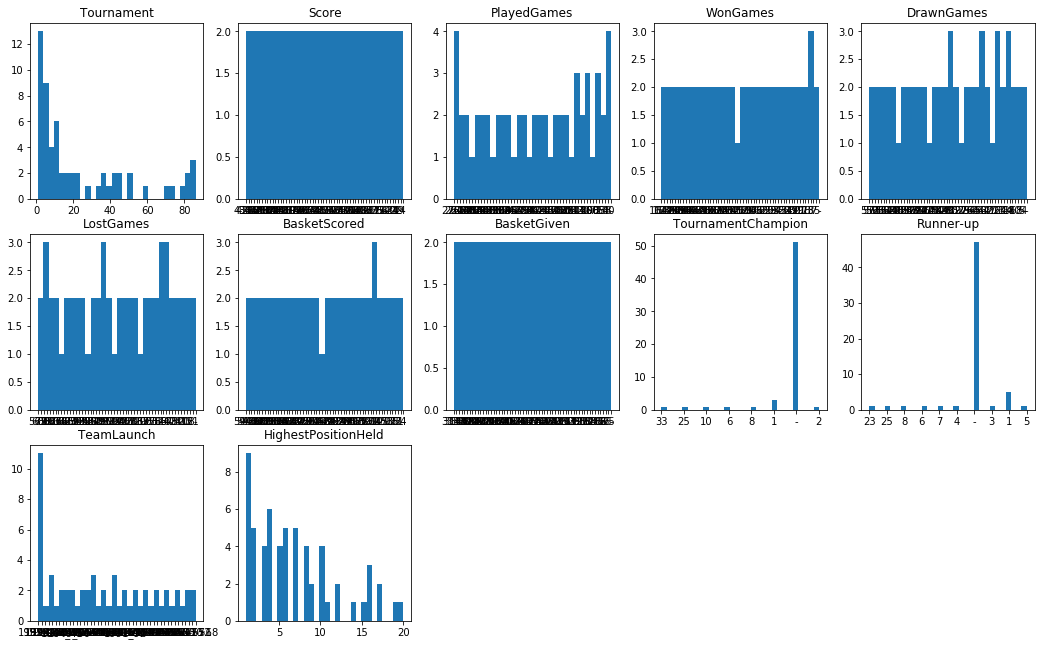%0A)

In \[60\]:

    # Create a histogram for the 'TournamentChampion' column, this time as a probability density.
    plt.hist(df[TournamentChampion], density=True, bins=30);

![](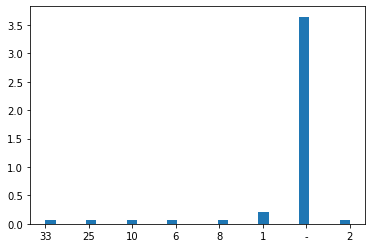%0A)

In \[62\]:

    # Plot the KDE for 'HighestPositionHeld' over the probability-density histogram.
    plt.hist(df[HighestPositionHeld], density=True, bins=15)
    plt.title(HighestPositionHeld histogram)
    sns.kdeplot(df[HighestPositionHeld]);

![](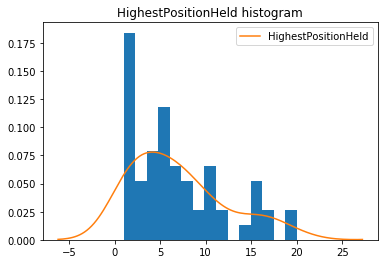%0A)

In \[66\]:

    # Plot the KDE for 'DRR' over the probability-density histogram.
    plt.hist(df[Tournament], density=True, bins=15)
    plt.title(Tournament histogram)
    sns.kdeplot(df[Tournament]);

![](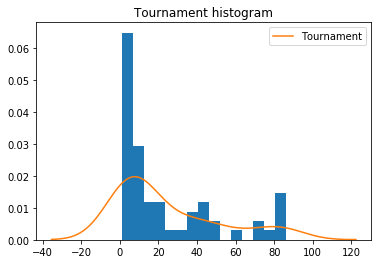%0A)

In \[68\]:

    df.loc[(df[HighestPositionHeld] >= 1600) & (df[Tournament] >= 15)].info()

    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 0 entries
    Data columns (total 13 columns):
    Team                   0 non-null object
    Tournament             0 non-null int64
    Score                  0 non-null object
    PlayedGames            0 non-null object
    WonGames               0 non-null object
    DrawnGames             0 non-null object
    LostGames              0 non-null object
    BasketScored           0 non-null object
    BasketGiven            0 non-null object
    TournamentChampion     0 non-null object
    Runner-up              0 non-null object
    TeamLaunch             0 non-null object
    HighestPositionHeld    0 non-null int64
    dtypes: int64(2), object(11)
    memory usage: 0.0+ bytes

In \[ \]:

    EDA

In \[94\]:

    df[HighestPositionHeld].value_counts()

Out\[94\]:

    1     9
    4     6
    2     5
    6     5
    7     5
    8     4
    3     4
    5     4
    10    4
    16    3
    9     2
    12    2
    17    2
    19    1
    11    1
    14    1
    15    1
    20    1
    Name: HighestPositionHeld, dtype: int64

In \[95\]:

    df[Team].unique()

Out\[95\]:

    array(['Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 6',
           'Team 7', 'Team 8', 'Team 9', 'Team 10', 'Team 11', 'Team 12',
           'Team 13', 'Team 14', 'Team 15', 'Team 16', 'Team 17', 'Team 18',
           'Team 19', 'Team 20', 'Team 21', 'Team 22', 'Team 23', 'Team 24',
           'Team 25', 'Team 26', 'Team 27', 'Team 28', 'Team 29', 'Team 30',
           'Team 31', 'Team 32', 'Team 33', 'Team 34', 'Team 35', 'Team 36',
           'Team 37', 'Team 38', 'Team 39', 'Team 40', 'Team 41', 'Team 42',
           'Team 43', 'Team 44', 'Team 45', 'Team 46', 'Team 47', 'Team 48',
           'Team 49', 'Team 50', 'Team 51', 'Team 52', 'Team 53', 'Team 54',
           'Team 55', 'Team 57', 'Team 58', 'Team 59', 'Team 60', 'Team 61'],
          dtype=object)

In \[102\]:

    df[(df[Tournament] == position2)]

Out\[102\]:

|     | Team | Tournament | Score | PlayedGames | WonGames | DrawnGames | LostGames | BasketScored | BasketGiven | TournamentChampion | Runner-up | TeamLaunch | HighestPositionHeld |
|-----|------|------------|-------|-------------|----------|------------|-----------|--------------|-------------|--------------------|-----------|------------|---------------------|

In \[103\]:

    df[Score].hist(bins=25)

Out\[103\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1fb70818948>

![](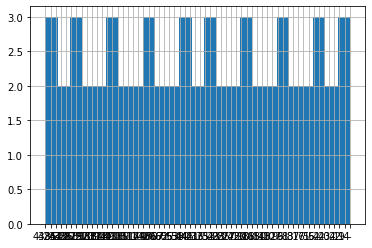%0A)

In \[104\]:

    df[HighestPositionHeld].hist(bins=200)

Out\[104\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1fb70912b88>

![](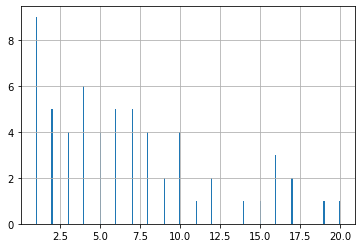%0A)

In \[106\]:

    print(df.boxplot(column=Tournament))

    AxesSubplot(0.125,0.125;0.775x0.755)

![](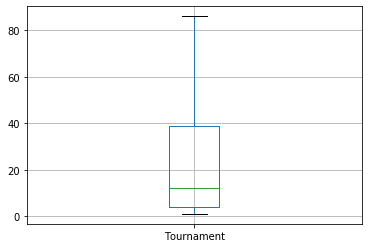%0A)

In \[122\]:

    sns.countplot(df.TournamentChampion)

Out\[122\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1fb710a2bc8>

![](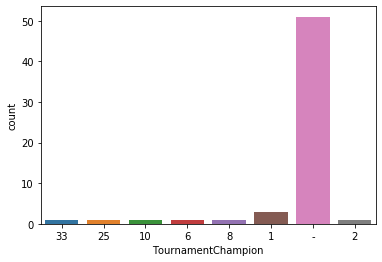%0A)

In \[120\]:

    sns.countplot(df.HighestPositionHeld)

Out\[120\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1fb711e2808>

![](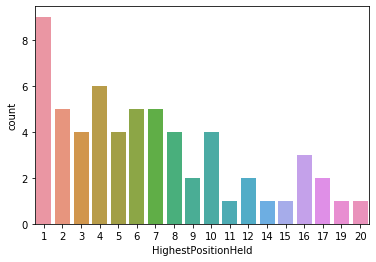%0A)

In \[119\]:

    sns.countplot(df.TeamLaunch)

Out\[119\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1fb719aa388>

![](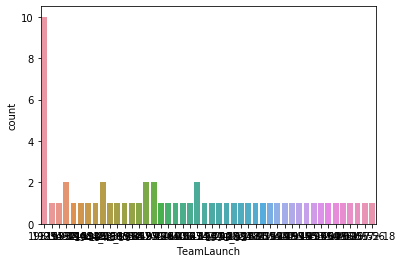%0A)

In \[125\]:

    sns.countplot(df.Score)

Out\[125\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x1fb7064b7c8>

![](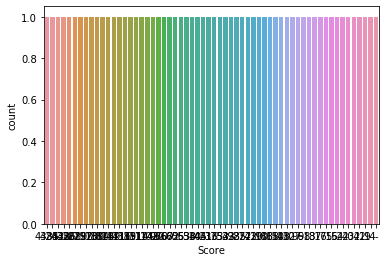%0A)

In \[ \]:

     

------------------------------------------------------------------------

<span id="2_"></span> <span id="2_1_"></span>

In \[25\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    import seaborn as sns

In \[26\]:

    data = pd.read_csv(CompanyX_EU.csv)  

In \[27\]:

    Company = [ 
              (2600Hz, 2600hz.com, NaN, Disrupt SF 2013,Contestant, Operating),
              (3DLT, 3dlt.com, $630K, Disrupt NYC 2013, Contestant, Closed),
              (3DPrinterOS, 3dprinteros.com, NaN, Disrupt SF 2016, Contestant, Operating),
              ]

In \[28\]:

    # Create a DataFrame
    df = pd.DataFrame(Company,
                      columns = [Startup, Product,
                                 Funding, Event,
                                  Result, Operating State])
    # show the dataframe
    df

Out\[28\]:

|     | Startup     | Product         | Funding | Event            | Result     | Operating State |
|-----|-------------|-----------------|---------|------------------|------------|-----------------|
| 0   | 2600Hz      | 2600hz.com      | NaN     | Disrupt SF 2013  | Contestant | Operating       |
| 1   | 3DLT        | 3dlt.com        | \$630K  | Disrupt NYC 2013 | Contestant | Closed          |
| 2   | 3DPrinterOS | 3dprinteros.com | NaN     | Disrupt SF 2016  | Contestant | Operating       |

In \[14\]:

    # Use Dataframe.dtypes to
    # give the series of 
    # data types as result
    datatypes = df.dtypes
      
    # Print the data types
    # of each column
    datatypes

Out\[14\]:

    Startup            object
    Product            object
    Funding            object
    Event              object
    Result             object
    Operating State    object
    dtype: object

In \[16\]:

    # Check the datatypes of each attribute.
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 3 entries, 0 to 2
    Data columns (total 6 columns):
    Startup            3 non-null object
    Product            3 non-null object
    Funding            3 non-null object
    Event              3 non-null object
    Result             3 non-null object
    Operating State    3 non-null object
    dtypes: object(6)
    memory usage: 272.0+ bytes

In \[17\]:

    # Check for null values in the attributes.
    print(data.isnull().sum())
    print(data.shape)

    Startup             0
    Product             6
    Funding           214
    Event               0
    Result              0
    OperatingState      0
    dtype: int64
    (662, 6)

In \[19\]:

    # Drop the null values.
    data.dropna(inplace=True)
    print(data.isnull().sum())
    print(data.shape)

    Startup           0
    Product           0
    Funding           0
    Event             0
    Result            0
    OperatingState    0
    dtype: int64
    (446, 6)

In \[21\]:

    df[Funding].head()

Out\[21\]:

    0      NaN
    1    $630K
    2      NaN
    Name: Funding, dtype: object

In \[22\]:

    # Convert the ‘Funding’ features to a numerical value.
    df[Funding].describe()

Out\[22\]:

    count       3
    unique      2
    top       NaN
    freq        2
    Name: Funding, dtype: object

In \[75\]:

    # Plot box plot for funds in million.
    import pandas as pd
    import numpy as np
    df = pd.DataFrame(np.random.rand(10, 1), columns=[Funding])
    df.plot.box(grid=True)

Out\[75\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x165b9d92e88>

![](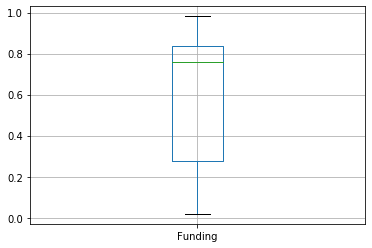%0A)

In \[ \]:

    The values of a categorical variable can be given numerical codes, but that doesn’t make the variable quantitative. 
    It displays a distribution and range of a set of numeric values plotted against a dimension. we can display this chart in three
    different ways, we can just have the value points displayed showing the distribution, or we can display the bounding box 
    which shows the range or use a combination of both.

In \[40\]:

    def remove_sign(x,sign):
        if type(x) is str:
            x = float(x.replace(sign,).replace(,,))
        return x

In \[ \]:

    # Get the lower fence from the box plot
    def remove_outlier_IQR(df):
        Q1=df.quantile(0.25)
        Q3=df.quantile(0.75)
        IQR=Q3-Q1
        df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
        return df_final

In \[52\]:

    value = float(input(Enter a decimal number: ))
    print(25*value)

    Enter a decimal number: 2.5
    62.5

In \[ \]:

    df = df.select_dtypes(include=[object]).copy()

In \[ \]:

     df.head()

In \[ \]:

    # Plot the box plot after dropping the values
    np.random.seed(1234)
    df = pd.DataFrame(np.random.randn(10, 4),
                     columns=[Col1, Col2, Col3, Col4])
    boxplot = df.boxplot(column=[Col1, Col2, Col3])

In \[ \]:

     

------------------------------------------------------------------------

<span id="2_2_"></span>

In \[5\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    import seaborn as sns

In \[6\]:

    data = pd.read_csv(CompanyX_EU.csv)  # read the csv file

In \[7\]:

    data

Out\[7\]:

|     | Startup         | Product            | Funding | Event            | Result          | OperatingState |
|-----|-----------------|--------------------|---------|------------------|-----------------|----------------|
| 0   | 2600Hz          | 2600hz.com         | NaN     | Disrupt SF 2013  | Contestant      | Operating      |
| 1   | 3DLT            | 3dlt.com           | \$630K  | Disrupt NYC 2013 | Contestant      | Closed         |
| 2   | 3DPrinterOS     | 3dprinteros.com    | NaN     | Disrupt SF 2016  | Contestant      | Operating      |
| 3   | 3Dprintler      | 3dprintler.com     | \$1M    | Disrupt NY 2016  | Audience choice | Operating      |
| 4   | 42 Technologies | 42technologies.com | NaN     | Disrupt NYC 2013 | Contestant      | Operating      |
| ... | ...             | ...                | ...     | ...              | ...             | ...            |
| 657 | Zivity          | zivity.com         | \$8M    | TC40 2007        | Contestant      | Operating      |
| 658 | Zmorph          | zmorph3d.com       | \$1M    | \-               | Audience choice | Operating      |
| 659 | Zocdoc          | zocdoc.com         | \$223M  | TC40 2007        | Contestant      | Operating      |
| 660 | Zula            | zulaapp.com        | \$3.4M  | Disrupt SF 2013  | Audience choice | Operating      |
| 661 | Zumper          | zumper.com         | \$31.5M | Disrupt SF 2012  | Finalist        | Operating      |

662 rows × 6 columns

In \[9\]:

    # Make a copy of the original data frame.
    data2 = data.copy()

In \[10\]:

    data2

Out\[10\]:

|     | Startup         | Product            | Funding | Event            | Result          | OperatingState |
|-----|-----------------|--------------------|---------|------------------|-----------------|----------------|
| 0   | 2600Hz          | 2600hz.com         | NaN     | Disrupt SF 2013  | Contestant      | Operating      |
| 1   | 3DLT            | 3dlt.com           | \$630K  | Disrupt NYC 2013 | Contestant      | Closed         |
| 2   | 3DPrinterOS     | 3dprinteros.com    | NaN     | Disrupt SF 2016  | Contestant      | Operating      |
| 3   | 3Dprintler      | 3dprintler.com     | \$1M    | Disrupt NY 2016  | Audience choice | Operating      |
| 4   | 42 Technologies | 42technologies.com | NaN     | Disrupt NYC 2013 | Contestant      | Operating      |
| ... | ...             | ...                | ...     | ...              | ...             | ...            |
| 657 | Zivity          | zivity.com         | \$8M    | TC40 2007        | Contestant      | Operating      |
| 658 | Zmorph          | zmorph3d.com       | \$1M    | \-               | Audience choice | Operating      |
| 659 | Zocdoc          | zocdoc.com         | \$223M  | TC40 2007        | Contestant      | Operating      |
| 660 | Zula            | zulaapp.com        | \$3.4M  | Disrupt SF 2013  | Audience choice | Operating      |
| 661 | Zumper          | zumper.com         | \$31.5M | Disrupt SF 2012  | Finalist        | Operating      |

662 rows × 6 columns

In \[3\]:

    my_tab = pd.crosstab(index=data[Startup],  # Make a crosstab
                         columns=count)                  # Name the count column

    my_tab

Out\[3\]:

col\_0

count

Startup

2600Hz

1

3DLT

1

3DPrinterOS

1

3Dprintler

1

42 Technologies

1

...

...

plaYce

1

productboard

1

sciencebite

1

threadsy

1

voicesphere

1

662 rows × 1 columns

In \[4\]:

    type(my_tab) 

Out\[4\]:

    pandas.core.frame.DataFrame

In \[5\]:

    pd.crosstab(index=data[OperatingState],  # Make a crosstab
                columns=count)      

Out\[5\]:

col\_0

count

OperatingState

Acquired

86

Closed

106

Ipo

5

Operating

465

In \[8\]:

    # Check frequency distribution of Result variable.
    pd.crosstab(index=data[Result],     # Make a crosstab
                          columns=count)      

Out\[8\]:

col\_0

count

Result

Audience choice

41

Contestant

488

Finalist

84

Runner up

23

Winner

26

In \[22\]:

    cabin_tab = pd.crosstab(index=data[Funding],  # Make a crosstab
                            columns=count)               # Name the count column

    cabin_tab 

Out\[22\]:

col\_0

count

Funding

\$1.1M

5

\$1.2M

9

\$1.3M

9

\$1.4M

7

\$1.5M

6

...

...

\$929.2K

1

\$93K

1

\$948K

1

\$956K

1

\$983K

1

240 rows × 1 columns

In \[14\]:

    print (cabin_tab.sum(), "\n")   # Sum the counts

    print (cabin_tab.shape, "\n")   # Check number of rows and cols

    cabin_tab.iloc[1:7]             # Slice rows 1-6

    col_0
    count    448
    dtype: int64 

    (240, 1) 

Out\[14\]:

col\_0

count

Funding

\$1.2M

9

\$1.3M

9

\$1.4M

7

\$1.5M

6

\$1.6M

3

\$1.7B

1

In \[15\]:

    cabin_tab/cabin_tab.sum()

Out\[15\]:

col\_0

count

Funding

\$1.1M

0.011161

\$1.2M

0.020089

\$1.3M

0.020089

\$1.4M

0.015625

\$1.5M

0.013393

...

...

\$929.2K

0.002232

\$93K

0.002232

\$948K

0.002232

\$956K

0.002232

\$983K

0.002232

240 rows × 1 columns

In \[27\]:

    probs = np.array([0.75, 0.25])
    face = [0, 1]
    plt.bar(face, probs)
    plt.title(Loaded coin Bernoulli Distribution, fontsize=12)
    plt.ylabel(Probability, fontsize=12)
    plt.xlabel(Loaded Event Outcome, fontsize=12)
    axes = plt.gca()
    axes.set_ylim([0,1])

Out\[27\]:

    (0, 1)

![](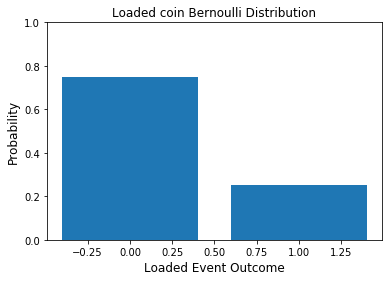%0A)

In \[ \]:

    Distribution is used to visualize the frequency by using numeric array. it can be divided into small sized bins. it is useful 
    while analyzing the data in the initial phase. According to the data we can plot the graph with the properties. Plotting a single variable
    seems should be easy, we can use it for matplotlib or seaborn. There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks.
    It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

In \[21\]:

    # comparing the funds raised by companies across NY, SF and EU events from
    #2013 onwards
    cabin_tab = pd.crosstab(index=data[Event],  # Make a crosstab
                            columns=2013)               # Name the count column

    cabin_tab 

Out\[21\]:

col\_0

2013

Event

\-

13

Disrupt Beijing 2011

18

Disrupt EU 2013

15

Disrupt EU 2014

15

Disrupt London 2015

15

Disrupt London 2016

13

Disrupt NY 2015

26

Disrupt NY 2016

22

Disrupt NYC 2010

22

Disrupt NYC 2011

32

Disrupt NYC 2012

30

Disrupt NYC 2013

31

Disrupt NYC 2014

27

Disrupt SF 2010

26

Disrupt SF 2011

31

Disrupt SF 2012

30

Disrupt SF 2013

31

Disrupt SF 2014

28

Disrupt SF 2015

27

Disrupt SF 2016

26

Hardware Battlefield 2014

14

Hardware Battlefield 2015

15

Hardware Battlefield 2016

13

TC40 2007

40

TC50 2008

52

TC50 2009

50

In \[20\]:

    # Plot comparing the 3 city events
    import matplotlib.pyplot as plt
    import numpy as np

    y = np.array([15, 31, 31])
    mylabels = [EU, NY, SF]

    plt.pie(y, labels = mylabels)
    plt.legend()
    plt.show() 

![](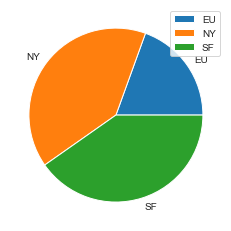%0A)

In \[ \]:

    It shows a static number and how categories represent part of a whole the composition. It represents numbers in percentages,
    and the total sum of all segments needs to equal 100%, which splits data into slices to show numerical proportion of each category. 

In \[ \]:

    # Calculate percentage of winners
    winning percentage = wins / games

In \[16\]:

    465/86

Out\[16\]:

    5.406976744186046

In \[21\]:

    import numpy as np
    from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
    from statsmodels.stats.power import ttest_power

In \[22\]:

    energ = np.array([
    # energy expenditure in mJ and stature (0=obese, 1=lean)
    [9.21, 0],
    [7.53, 1],
    [7.48, 1],
    [8.08, 1],
    [8.09, 1],
    [10.15, 1],
    [8.40, 1],
    [10.88, 1],
    [6.13, 1],
    [7.90, 1],
    [11.51, 0],
    [12.79, 0],
    [7.05, 1],
    [11.85, 0],
    [9.97, 0],
    [7.48, 1],
    [8.79, 0],
    [9.69, 0],
    [9.68, 0],
    [7.58, 1],
    [9.19, 0],
    [8.11, 1]])

In \[24\]:

     #Seperating the data into 2 groups
    group1 = energ[:, 1] == 0
    group1 = energ[group1][:, 0]
    group2 = energ[:, 1] == 1
    group2 = energ[group2][:, 0]

In \[26\]:

    # two-sample t-test
    # null hypothesis: the two groups have the same mean
    # this test assumes the two groups have the same variance...
    # (can be checked with tests for equal variance - Levene)
    # independent groups: e.g., how boys and girls fare at an exam
    # dependent groups: e.g., how the same class fare at 2 different exams
    t_statistic, p_value = ttest_ind(group1, group2)
    print(t_statistic, p_value)

    3.9455649161549835 0.0007989982111700593

In \[27\]:

    # p_value < 0.05 => alternative hypothesis:
    # they don't have the same mean at the 5% significance level
    print (two-sample t-test p-value=, p_value)

    two-sample t-test p-value= 0.0007989982111700593

In \[31\]:

    # pre and post-surgery energy intake
    intake = np.array([
    [5260, 3910],
    [5470, 4220],
    [5640, 3885],
    [6180, 5160],
    [6390, 5645],
    [6515, 4680],
    [6805, 5265],
    [7515, 5975],
    [7515, 6790],
    [8230, 6900],
    [8770, 7335],
    ])

In \[32\]:

    # Seperating data into 2 groups
    pre = intake[:, 0]
    post = intake[:, 1]

In \[33\]:

    # paired t-test: doing two measurments on the same experimental unit
    # e.g., before and after a treatment
    t_statistic, p_value = ttest_1samp(post - pre, 0)
    print(t_statistic, p_value)

    -11.941392877647603 3.059020942934875e-07

In \[34\]:

    # p < 0.05 => alternative hypothesis:
    # the difference in mean is not equal to 0
    print (paired t-test p-value=, p_value)

    paired t-test p-value= 3.059020942934875e-07

In \[ \]:

    # null hypothesis that are operating between winners and contestants:
    Ho:p ≤ 0.5
    H1:p > .5

In \[30\]:

    2200/4300

Out\[30\]:

    0.5116279069767442

In \[ \]:

    # Test for significance
    z = (28.5 - 30)/(8/sqrt(100)) 

In \[37\]:

    488/26

Out\[37\]:

    18.76923076923077

------------------------------------------------------------------------

<span id="2_3_"></span>

In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats as stats
    import seaborn as sns

In \[2\]:

    data = pd.read_csv(CompanyX_EU.csv) # read csv file

In \[4\]:

    data.sample(3).T

Out\[4\]:

|                | 285              | 86               | 119              |
|----------------|------------------|------------------|------------------|
| Startup        | Keen Home        | CallApp          | Cohero Health    |
| Product        | keenhome.io      | callapp.com      | coherohealth.com |
| Funding        | \$1.6M           | \$5M             | \$2M             |
| Event          | Disrupt NYC 2013 | Disrupt NYC 2012 | Disrupt SF 2015  |
| Result         | Contestant       | Contestant       | Contestant       |
| OperatingState | Operating        | Operating        | Operating        |

In \[5\]:

    # Check frequency of the OperatingState features classes.
    #define Series
    data = pd.Series([1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5])

    #find frequencies of each value
    data.value_counts()

Out\[5\]:

    3    4
    1    3
    4    2
    5    1
    2    1
    dtype: int64

In \[7\]:

    Company = [ 
              (2600Hz, 2600hz.com, NaN, Disrupt SF 2013,Contestant, Operating),
              (3DLT, 3dlt.com, $630K, Disrupt NYC 2013, Contestant, Closed),
              (3DPrinterOS, 3dprinteros.com, NaN, Disrupt SF 2016, Contestant, Operating),
              ]

In \[8\]:

    # Create a DataFrame
    df = pd.DataFrame(Company,
                      columns = [Startup, Product,
                                 Funding, Event,
                                  Result, Operating State])
    # show the dataframe
    df

Out\[8\]:

|     | Startup     | Product         | Funding | Event            | Result     | Operating State |
|-----|-------------|-----------------|---------|------------------|------------|-----------------|
| 0   | 2600Hz      | 2600hz.com      | NaN     | Disrupt SF 2013  | Contestant | Operating       |
| 1   | 3DLT        | 3dlt.com        | \$630K  | Disrupt NYC 2013 | Contestant | Closed          |
| 2   | 3DPrinterOS | 3dprinteros.com | NaN     | Disrupt SF 2016  | Contestant | Operating       |

In \[9\]:

    # Check frequency of the OperatingState features classes.
    pd.crosstab(index=df[Operating State], columns=count)

Out\[9\]:

col\_0

count

Operating State

Closed

1

Operating

2

In \[17\]:

    import numpy as np

    x = np.random.normal(170, 10, 250)

    print(x)

    [160.45266747 162.22502724 159.20262992 169.08934566 164.28688261
     174.19275188 179.72065831 160.10000749 160.2570762  163.49470096
     182.84483158 151.29510911 179.94984166 169.74456329 184.77182607
     194.1339037  164.19607425 177.55537543 163.12897054 177.67581893
     164.3696309  165.38729199 167.45000598 155.90807851 165.75630526
     175.74079633 164.60237614 174.92966422 167.44758548 163.52262085
     173.37260214 162.76029534 174.71259608 161.53568762 170.95296129
     158.70660507 175.33343401 161.12608144 183.04531223 167.59548685
     189.51016737 168.51130334 187.31919282 189.21285048 167.88032898
     188.6351451  172.53929194 160.88387914 163.90661166 167.99938607
     158.44090638 176.31788974 175.88679441 161.56473967 174.96049763
     163.31506916 166.72828188 147.85129836 175.48991379 166.2986013
     168.93951512 184.34403417 172.03560206 190.32508467 161.60876902
     179.72355533 174.46722513 162.60180688 170.8626657  163.93800726
     170.87396603 170.08156479 166.32215758 183.59414034 174.49076989
     166.77425243 156.44109849 187.25462317 168.38856612 174.14071258
     159.44213827 156.9422713  180.8342432  162.74802607 166.84887837
     168.09834557 161.30616858 167.11940323 167.33937028 172.9388021
     165.85781801 181.37458097 173.39661582 155.21196137 179.53888186
     167.13075096 177.50704549 166.19724958 155.63070575 177.06970343
     149.33400022 167.43392058 183.11169059 189.75162565 178.8805994
     156.77517123 179.93027867 184.30466545 149.77307917 186.84142314
     177.31246213 155.25091634 166.40274978 176.78489312 155.42956987
     168.46748301 154.59400988 166.39354472 166.50743525 167.91869827
     169.03538416 187.3719826  172.73322941 166.59175786 157.57165745
     159.43619309 156.2102577  162.23253692 173.65466144 153.1359032
     160.28942011 171.84716655 172.94095987 172.13087118 171.22752285
     160.43928089 161.96355627 163.66521118 166.01696441 180.52093119
     171.78070891 181.17294166 160.02998836 151.21423718 177.17399927
     168.04472006 165.74188681 185.56607928 160.3755262  165.88355074
     154.78208071 169.86733641 169.82229095 162.3555169  161.29610719
     172.69323906 153.08539612 153.21461574 163.57447809 179.74669815
     187.75131829 153.04652179 176.59396737 153.55102045 174.15443666
     175.09853811 185.88273121 165.60467046 156.87792709 163.82874189
     173.3480357  169.26667098 166.05188343 167.01989048 171.99906682
     157.56603273 185.87529541 170.18746265 169.86311608 180.09255346
     186.54642136 156.02192851 178.74308547 186.14465393 171.75082152
     163.87015025 170.44425842 169.23456154 195.49288467 170.97527634
     169.57143829 164.36035051 175.10395461 177.61743151 158.93411836
     161.78717708 157.59397623 185.03125713 181.61594599 155.58232858
     167.52986425 170.96392738 180.87555592 166.32982939 176.07690821
     170.96364971 180.9188001  182.51549433 161.04879083 150.39188017
     159.93942365 170.90477205 186.18627071 170.75799751 179.3131914
     168.6613562  179.32863727 173.52025884 179.83080328 158.22069839
     160.77183677 163.29581614 158.87509993 166.88770187 162.01689671
     166.13692805 156.93433777 159.18888368 180.64253301 157.7336204
     163.40243264 182.59348563 172.39713067 174.11004763 178.73982744
     172.7102465  179.7701733  168.62933107 192.7695806  181.96631096
     170.1812404  182.4003631  153.45850035 167.0322701  155.1036529
     168.30893964 167.47610219 154.26019373 161.22863681 186.14689499]

In \[18\]:

    # Funds in million
    import matplotlib.pyplot as plt
    import numpy as np

    x = np.random.normal(170, 10, 250)

    plt.hist(x)
    plt.show()

![](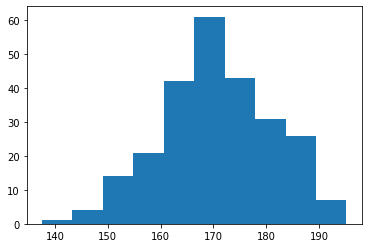%0A)

In \[ \]:

    Box plots are used to visualize summary statistics of a dataset, displaying attributes of the distribution like the data’s range and distribution.
    The Box Plot shows the median of the dataset (the vertical line in the middle), as well as the interquartile ranges (the ends of the boxes) and the minimum and maximum values of the chosen dataset feature .
    We can customize the plot and add labels to the X-axis by using the xticks function. we can pass the number of labels we want to add and then the labels for each of those columns

In \[20\]:

    # companies still operating and companies that closed.
    plt.hist(df[Operating State])

Out\[20\]:

    (array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
     array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
     <a list of 10 Patch objects>)

![](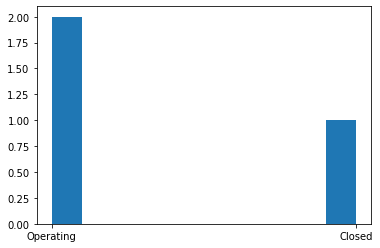%0A)

In \[ \]:

    The distribution plot can be used for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis.
    his particular plot simply shows us four numbers, one for each category.

------------------------------------------------------------------------

<span id="3_"></span>

In \[ \]:

    1. Question: Please refer the table below to answer below questions:
    1. Refer to the above table and find the joint probability of the people who planned to purchase and actually
    placed an order.

1.1.find the joint probability of the people who planned to purchase and
actually placed an order. sol : You observe from the above table, that
400 people planned to purchase and actually placed an order for productA
is 400 out of 2000 people. \# FE6 is the number of people who planned
and actually placed an order for product A FE6 = 400 TE = 2000 PE7 =
round(FE6 / TE,4) print('Joint probability of the people who planned to
purchase and actually placed an order. is %1.4f' % PE7) Joint
probability of the people who planned to purchase and actually placed an
order. is 0.2000 1.2.Find the joint probability of the people who
planned to purchase and actually placed an order, given that people
planned to purchase. sol: \# P1 = P(Actually placed an order \| Planned
to purchase) \# P2 = Planned to purchase and actually placed an order \#
P3 = Planned to purchase P1 = (400 / 2000 )/ (500 / 2000)
print('P(Actually placed an order \| Planned to purchase) is %1.4f' %
P1) P(Actually placed an order \| Planned to purchase) is 0.80002.A LED
bulb manufacturing company regularly conducts quality checks at
specified periods on the products it manufactures. Historically, the
failure rate for LED light bulbs that the company manufactures is 5%.
Suppose a random sample of 10 LED light bulbs is selected. What is the
probability that a) None of the LED bulbs are defective? b) Exactly one
of the LED bulbs is defective? c) Two or fewer of the LED bulbs are
defective? d) Three or more of the LED bulbs are defective

In \[2\]:

    import numpy             as np
    import pandas            as pd
    import scipy.stats       as stats
    import matplotlib.pyplot as plt

In \[3\]:

    p   =  0.05 # failure rate for LED light bulbs that the company manufactures is 5%
    n   =  10 # sample size
    k   =  np.arange(0,11) # An array of quantiles

In \[5\]:

    binomial = stats.binom.pmf(k,n,p)

    [5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
     9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
     1.58642578e-09 1.85546875e-11 9.76562500e-14]

In \[6\]:

    print(binomial)

    [5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
     9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
     1.58642578e-09 1.85546875e-11 9.76562500e-14]

In \[7\]:

    print('a) None of the LED bulbs are defective? is %1.4f' %binomial[0])

    a) None of the LED bulbs are defective? is 0.5987

In \[8\]:

    print('b) Exactly one of the LED bulbs is defective? is %1.4f' %binomial[1])

    b) Exactly one of the LED bulbs is defective? is 0.3151

To answer the question c) Two or fewer of the LED bulbs are defective?

we need to calculate cumulative probability of Upto Two LED bulbs being
defective

In \[10\]:

    cumbinomial = stats.binom.cdf(k,n,p)

In \[11\]:

    print(cumbinomial)

    [0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
     0.99999992 1.         1.         1.         1.        ]

In \[12\]:

    print('c) Two or fewer of the LED bulbs are defective? is %1.4f' %cumbinomial[2])

    c) Two or fewer of the LED bulbs are defective? is 0.9885

In \[13\]:

    P = 1- cumbinomial[2]
    print('d) Three or more of the LED bulbs are defective is %1.4f' % P)

    d) Three or more of the LED bulbs are defective is 0.0115

plot the binomial distribution function

In \[14\]:

    plt.plot(k,binomial, o-)
    plt.title(Binomial)
    plt.xlabel(Number of Def LED bulbs)
    plt.ylabel(Prob of Defective LED bulbs)
    plt.show()

![](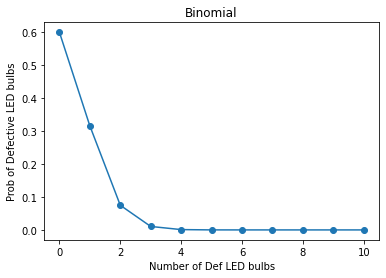%0A)

3.A car salesman sells on an average 3 cars per week. A. Probability
that in a given week he will sell some cars. B. Probability that in a
given week he will sell 2 or more but less than 5 cars. C. Plot the
poisson distribution function for cumulative probability of cars sold
per-week vs number of cars sold perweek.

In \[15\]:

    sol: rate =  3 # which is the mean
    n    =  np.arange(0,16)
    cumpoisson = stats.poisson.cdf(n,rate)
        

In \[16\]:

    cumpoisson

Out\[16\]:

    array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
           0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
           0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933,
           0.99999988])

In \[17\]:

    # P = probability that the salesman sells some cars
    P   = 1 - cumpoisson[0]
    print(' a) Probability that the salesman sells some cars is %1.4f' % P)

     a) Probability that the salesman sells some cars is 0.9502

b\. salesman sells 2 or more but less than 5 cars

In \[18\]:

    # Let P1 be the probability that the salesman sells more than 4 cars
    P1 = cumpoisson[4] # P(X >=4)
    # Let P2 be the probability that the salesman sells more than 1 car
    P2 = cumpoisson[1] # P(X >=1)
    P = P1 - P2 # Prob. that the salesman will sell between 2 and 5 cars
    print(' b) Probability that the salesman sells between 2 and 5 cars is %1.4f' % P)

     b) Probability that the salesman sells between 2 and 5 cars is 0.6161

Plot a poisson distribution function

In \[19\]:

    poisson = stats.poisson.pmf(n,rate)
    plt.plot(n,poisson, o-)
    plt.title(Poisson)
    plt.xlabel(Number of Policies sold per week)
    plt.ylabel(Cumulative Prob of Policies sold per week)
    plt.show()

![](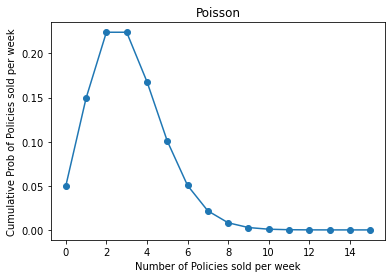%0A)

4\. Accuracy in understanding orders for a speech based bot at a
restaurant is important for the Company X which has designed, marketed
and launched the product for a contactless delivery due to the COVID-19
pandemic. Recognition accuracy that measures the percentage of orders
that are taken correctly is 86.8%. Suppose that you place order with the
bot and two friends of yours independently place orders with the same
bot. Answer the following questions. A. What is the probability that all
three orders will be recognised correctly? B. What is the probability
that none of the three orders will be recognised correctly? C. What is
the probability that at least two of the three orders will be recognised
correctly?sol: Because there are three orders and the probability of a
correct order is 0.868. Using Binomial distribution equation, P(X = 3\|n
=3, pi given = 0.868) 3!/ 3!(3-3)! \* (0.868)^3 \* (1-0.868)^3-3 =
0.6540 Similarly (X = 0) = 0.0023 (X = 2) = 0.2984 Hence, P(X\>=2) =
P(X=2)+P(X=3) = 0.9524The probability that all the three orders are
filled correctly is 0.6540, 65.4% The probability that none of the
orders are filled correctly is 0.0023, 0.23% The probability that atleat
two of the three are filled correctly is 0.9524, 95.24%5.A group of 300
professionals sat for a competitive exam. The results show the
information of marks obtained by them have a mean of 60 and a standard
deviation of 12. The pattern of marks follows a normal distribution.
Answer the following questions. A. What is the percentage of students
who score more than 80. B. What is the percentage of students who score
less than 50. C. What should be the distinction mark if the highest 10%
of students are to be awarded distinction?A) Z = (x - µ)/σ (80 -60)/12
=1.67 proportions of students who score more than 1.67 is = 0.5 - 0.4525
= 0.0475 (the cumulative from mean probability and percentile for 1.67 z
score is 0.4525 ) That is 4.75% of students have scored more than 80B)
similarly (50 - 60)/12 = -0.8333. Applying the property of symmetry, the
area upto -0.8333 is same as area more than 0.8333 in the positive side.
As before, it is = 0.5 - area between 0 and 0.8333 = 0.5 - 0.2967 =
0.2033. That is 20.33% of students scored below 50c) Z = (x-60)/12. Here
look at the normal tabel in inverse manner. That is the value of Z, the
area between 0 and z = 0.40. this is to be seen from teh table. The Z
value that will make the area = 0.40 is = 1.28. But z= (x - 60)/12.
Hence (x-60)/12 = 1.28 Simplifying, x= 75.36 This is the distinction
mark that will be scored by 10% of the students.6.Explain 1 real life
industry scenario \[other than the ones mentioned above\] where you can
use the concepts learnt in this module of Applied statistics to get a
data driven business solution. sol : e-commerce sites typically use data
to drive profits and sales.when u shop using e commerce site you will
recieve a product recommendation which inturn is used by company to
generate more revenue predict future trendsand produce actionable
insights